In [1]:
from matplotlib import pyplot as plt
from collections import Counter

# Single Set of Data

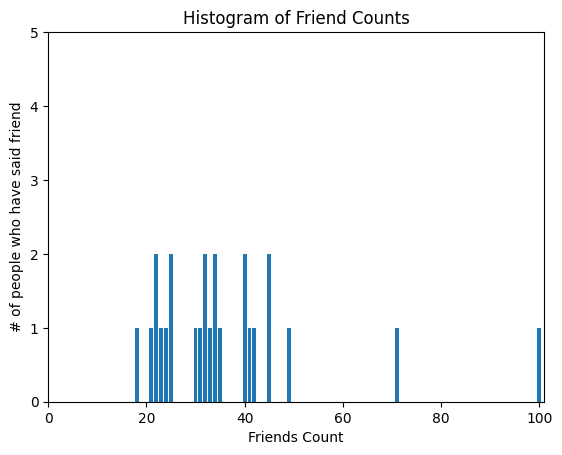

In [2]:
num_of_friends = [100, 49, 41, 40, 25, 32, 40, 42, 45, 45, 71, 32, 33, 34, 34, 35, 21, 22, 22, 24, 23, 25, 18, 30, 31]

friends_counted = Counter(num_of_friends)
xs = range(101)
ys = [friends_counted[x] for x in xs] # buat ngekumpulin jumlah temen tiap value (1: berapa temen)
plt.bar(xs, ys)
plt.axis([0, 101, 0, 5])
plt.title("Histogram of Friend Counts")
plt.xlabel("Friends Count")
plt.ylabel("# of people who have said friend")

plt.show()

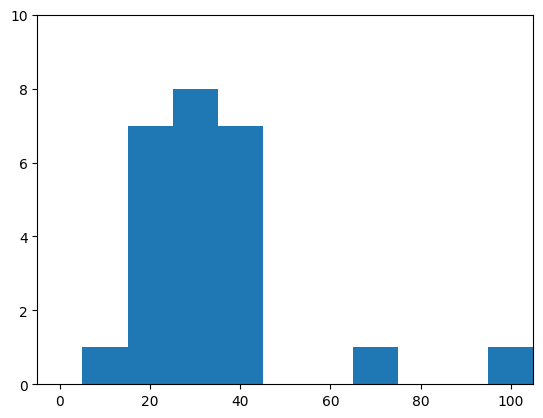

In [4]:
# bisa juga digrouping

decile = lambda x: (x // 10) * 10
grouped_friends = Counter(decile(x) for x in num_of_friends)
group_of_tens = [x*10 for x in range (11)]
ys_new = [grouped_friends[x] for x in group_of_tens]

plt.bar(group_of_tens, ys_new, 10)
plt.axis([-5, 105, 0, 10])

plt.show()


In [6]:
num_points = len(num_of_friends) #25 data points

25

In [8]:
largest_values = max(num_of_friends)
smallest_values = min(num_of_friends)

print(largest_values, smallest_values)

100 18


In [9]:
sorted_friends = sorted(num_of_friends)

print(sorted_friends)

[18, 21, 22, 22, 23, 24, 25, 25, 30, 31, 32, 32, 33, 34, 34, 35, 40, 40, 41, 42, 45, 45, 49, 71, 100]


### Central Tendencies

In [11]:
def mean(x):
    return sum(x)/len(x)

mean(num_of_friends)

36.56

In [13]:
def median(x):
    sorted_x = sorted(x)
    n = len(x)
    stay_in_middle = n // 2
    
    # Jangan lupa indexing mulai dari 0 <3
    if n % 2 == 1:
        return(sorted_x[stay_in_middle])
    else:
        high = stay_in_middle
        low = stay_in_middle - 1

        return (high-low)/2
    
median(num_of_friends)


33

In [16]:
def quantile(x, p):
    p_index = int(p * len(x))
    return sorted(x)[p_index]

a = quantile(num_of_friends, 0.10)
b = quantile(num_of_friends, 0.25)
c = quantile(num_of_friends, 0.75)
d = quantile(num_of_friends, 0.90)

print(a, b, c, d)

22 25 41 49


In [33]:
def mode(x):
    counts = Counter(x)
    max_count = max(counts.values())
    list_of_max_values = []

    for item, count in counts.items():
        if count == max_count:
            list_of_max_values.append(item)

    return list_of_max_values


mode(num_of_friends)

[40, 25, 32, 45, 34, 22]

### Dispersion

In [34]:
def data_range(x):
    return max(x) - min(x)

data_range(num_of_friends)

82

In [39]:
def dot(v, w):
    return sum(v_i * w_i
               for v_i, w_i in zip(v,w))

def sum_of_squares(v):
    return dot(v,v)

In [40]:
def de_mean(x):
    x_bar = mean(x)
    return [x_ - x_bar for x_ in x]

def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / ( n - 1 ) # Jangan lupa index mulai dari 0

variance(num_of_friends)

306.0066666666666

In [41]:
import math

def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_of_friends)

17.493046237481526

In [42]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

interquartile_range(num_of_friends)

16